In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [15]:
def getMonData(channel, file):
    data=[]
    with open(file) as file:
        for line in file:
            data.append(line)
    timeline= data[46]
    starttime = timeline[timeline.index(': ')+2:timeline.index(' at')]+' '+timeline[timeline.index('at ')+3:timeline.index('at ')+11]
    starttime=datetime.datetime.strptime(starttime,'%d/%m/%Y %H:%M:%S')
    starttime+datetime.timedelta(0,3)
    colnames = [data[47].split('\t')[i].strip() for i in range(3)]
    dataRaw=[[i.strip() for i in j.split('\t')] for j in data[48::]]
    if channel == 'A':
        indA=[ind for ind, item in enumerate(dataRaw) if item[2].strip()==""]
    else:
        indA=[ind for ind, item in enumerate(dataRaw) if item[1].strip()==""]
    dataA_time =  [starttime+datetime.timedelta(0,i) for i in np.array(dataRaw)[indA].T[0].astype(float)]
    if channel == 'A':
        dataA_Power =  np.array(dataRaw)[indA].T[1].astype(float)
    else:
        dataA_Power =  np.array(dataRaw)[indA].T[2].astype(float)
    df = pd.DataFrame({channel+" Time":dataA_time, channel+" Power" : dataA_Power})
    df[channel+' Rel.Time'] = df[channel+' Time']-df[channel+' Time'][0]
    df[channel+' Rel.Time [h]']=df[channel+' Rel.Time']/ np.timedelta64(1, 'h')
    df[channel+' Rel.Time [s]']=df[channel+' Rel.Time']/ np.timedelta64(1, 's')
    #df.to_excel(file[:-4]+".xlsx")
    return df
def powerTxt2EXCEL(file):
    getMonData('A',file).join(getMonData('B',file)).to_excel(file[:-4]+".xlsx")
    print('Done!')
    return getMonData('A',file).join(getMonData('B',file))

In [16]:
data5=powerTxt2EXCEL('Multi_05.txt')
data6=powerTxt2EXCEL('Multi_06.txt')
data7=powerTxt2EXCEL('Multi_07.txt')
data8=powerTxt2EXCEL('Multi_08.txt')

Done!
Done!
Done!
Done!


In [18]:
finaldata =data5.append(data6).append(data7).append(data8)
finaldata.reset_index(drop=True, inplace=True)
for i in ['A', 'B']:
    finaldata[i+' Rel.Time'] = finaldata[i+' Time']-finaldata[i+' Time'][0]
    finaldata[i+' Rel.Time [h]']=finaldata[i+' Rel.Time']/ np.timedelta64(1, 'h')
    finaldata[i+' Rel.Time [s]']=finaldata[i+' Rel.Time']/ np.timedelta64(1, 's')

In [20]:
finaldata.to_excel("powerLog.xlsx")

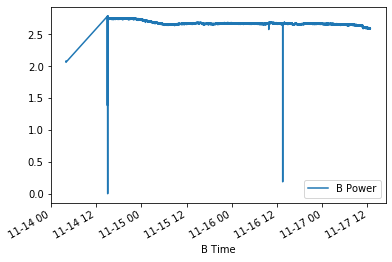

In [24]:
finaldata.plot(x='B Time', y='B Power')